# 01-Kaggle House Prices 2023

## Import data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from pandas.api.types import CategoricalDtype
import pandas.testing as pd_testing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('data/House_Price_dataset.csv')
# df2 = pd.read_csv('data/For_EDA_dataset.csv', index_col=0, parse_dates=['date_added'])
df2 = pd.read_csv('data/Cleaned_data_for_model.csv', index_col=0)

## Data structure

In [3]:
df.shape

(168446, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type      168446 non-nul

In [5]:
# Properties with "0"-values
# decimals instead of scientific E
# plot histograms, doar numerice
df.describe()

# price
# The price distribution is highly right-skewed, with a wide range of prices.

# baths
# The number of baths seems to have a wide range, and the maximum value might be an outlier.

# bedrooms
# Similar to the number of baths, the number of bedrooms also has a wide range.

# Area Size
# The area size also has a wide range, and the maximum value might be an outlier.

,property_id,location_id,price,latitude,longitude,baths,bedrooms,Area Size
count,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,5.892188
std,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,5.778327
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000
25%,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,3.000000
50%,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,5.000000
75%,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,8.000000
max,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,800.000000


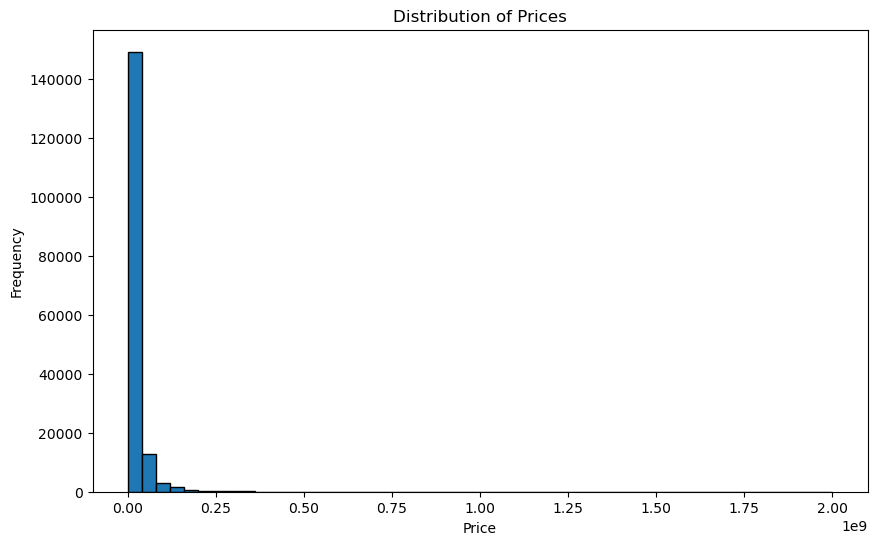

count    1.684460e+05
mean     1.776576e+07
std      3.531003e+07
min      0.000000e+00
25%      1.750000e+05
50%      8.500000e+06
75%      1.950000e+07
max      2.000000e+09
Name: price, dtype: float64


In [6]:
# Plotting a histogram for the 'price' column
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50, edgecolor='black')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Additional statistics
price_stats = df['price'].describe()
print(price_stats)

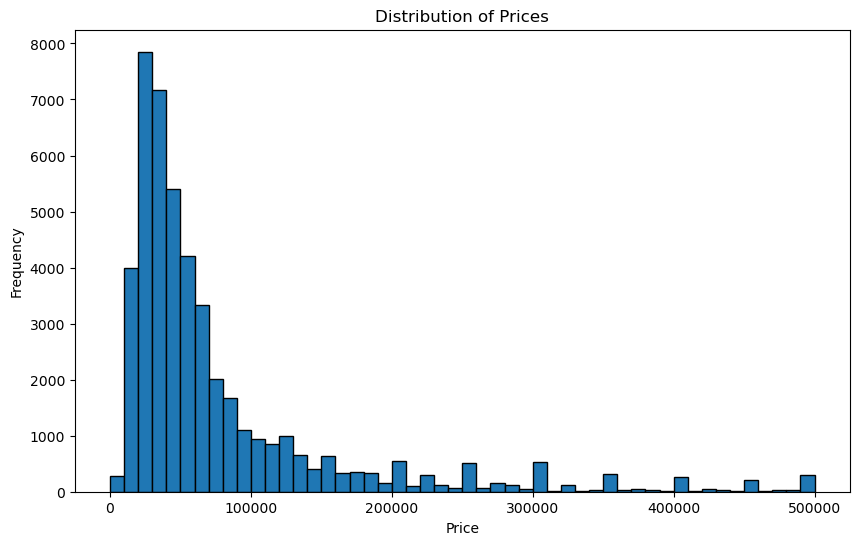

In [7]:
# 2024-02-09
# Zoom in
data = df[df['price'] <= 500000]
plt.figure(figsize=(10, 6))
plt.hist(data['price'], bins=50, edgecolor='black')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [8]:
df.isnull().sum()

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Area Type            0
Area Size            0
Area Category        0
dtype: int64

In [9]:
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


## Values per property

In [10]:
unique_locations = df['location_id'].unique()
unique_locations

array([ 3325,  3236,   764, ...,  9782, 13962, 13689])

In [11]:
# Extra from documentaion: "Penthouse"
df['property_type'].value_counts(dropna=False)

property_type
House            105468
Flat              38238
Upper Portion     13774
Lower Portion      9229
Room                685
Farm House          657
Penthouse           395
Name: count, dtype: int64

In [12]:
df['location'].nunique()

1509

In [13]:
df['city'].value_counts()

city
Karachi       60484
Lahore        41427
Islamabad     37426
Rawalpindi    20976
Faisalabad     8133
Name: count, dtype: int64

In [14]:
df['province_name'].value_counts()

province_name
Punjab               70536
Sindh                60484
Islamabad Capital    37426
Name: count, dtype: int64

In [15]:
df['baths'].value_counts().sort_index()

baths
0      42382
1       5356
2      25754
3      34603
4      19407
5      15303
6      16648
7       5385
8       2035
9        696
10       855
11         5
12        10
13         3
14         3
403        1
Name: count, dtype: int64

In [16]:
df['price_bins'] = pd.qcut(df['price'], 30)
df['price_bins'].value_counts().sort_index()

price_bins
(-0.001, 21000.0]             5802
(21000.0, 28000.0]            6174
(28000.0, 35000.0]            5738
(35000.0, 45000.0]            6352
(45000.0, 55000.0]            4512
(55000.0, 75000.0]            5593
(75000.0, 120000.0]           5240
(120000.0, 300000.0]          5828
(300000.0, 2490000.0]         5308
(2490000.0, 3700000.0]        5870
(3700000.0, 4600000.0]        5375
(4600000.0, 5500000.0]        5678
(5500000.0, 6500000.0]        6787
(6500000.0, 7500000.0]        5856
(7500000.0, 8500000.0]        5496
(8500000.0, 9500000.0]        5176
(9500000.0, 11000000.0]       6505
(11000000.0, 12000000.0]      4359
(12000000.0, 13300000.0]      5069
(13300000.0, 14500000.0]      6020
(14500000.0, 16000000.0]      5876
(16000000.0, 18000000.0]      5173
(18000000.0, 21000000.0]      6426
(21000000.0, 24000000.0]      5366
(24000000.0, 27500000.0]      4796
(27500000.0, 35000000.0]      6420
(35000000.0, 42500000.0]      5056
(42500000.0, 55000000.0]      5937
(55000000

In [17]:
pd.crosstab(df['price_bins'], df['baths'])

baths,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,403
price_bins,,,,,,,,,,,,,,,,
"(-0.001, 21000.0]",2317,1035,1892,503,30,6,9,3,3,1,3,0,0,0,0,0
"(21000.0, 28000.0]",2379,424,2161,1025,147,17,18,1,1,0,1,0,0,0,0,0
"(28000.0, 35000.0]",1955,191,1655,1481,355,60,30,8,1,0,2,0,0,0,0,0
"(35000.0, 45000.0]",1911,119,1336,2095,646,154,83,7,1,0,0,0,0,0,0,0
"(45000.0, 55000.0]",1173,66,678,1594,632,242,110,12,2,1,2,0,0,0,0,0
"(55000.0, 75000.0]",1504,35,505,2091,784,346,282,34,10,2,0,0,0,0,0,0
"(75000.0, 120000.0]",1320,33,302,1516,938,459,476,122,54,12,7,0,1,0,0,0
"(120000.0, 300000.0]",1385,24,202,828,899,944,999,282,134,63,65,0,1,1,1,0
"(300000.0, 2490000.0]",1435,1147,911,94,133,272,458,292,174,145,244,0,1,0,2,0


In [18]:
df['purpose'].value_counts()

purpose
For Sale    120655
For Rent     47791
Name: count, dtype: int64

In [19]:
df['bedrooms'].value_counts()

bedrooms
3     45867
2     30741
5     23452
4     23027
0     22704
6     11929
1      4434
7      2973
8      1451
9       782
10      611
11      416
12       25
14        8
15        7
16        4
28        4
13        3
25        3
18        2
21        1
68        1
27        1
Name: count, dtype: int64

## Empty values

In [20]:
df['Area Type'].value_counts()

Area Type
Marla    137769
Kanal     30677
Name: count, dtype: int64

In [21]:
# See hypotests if it counts agency null
df.isna().sum()

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Area Type            0
Area Size            0
Area Category        0
price_bins           0
dtype: int64

## Structure

/home/liviu/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/liviu/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


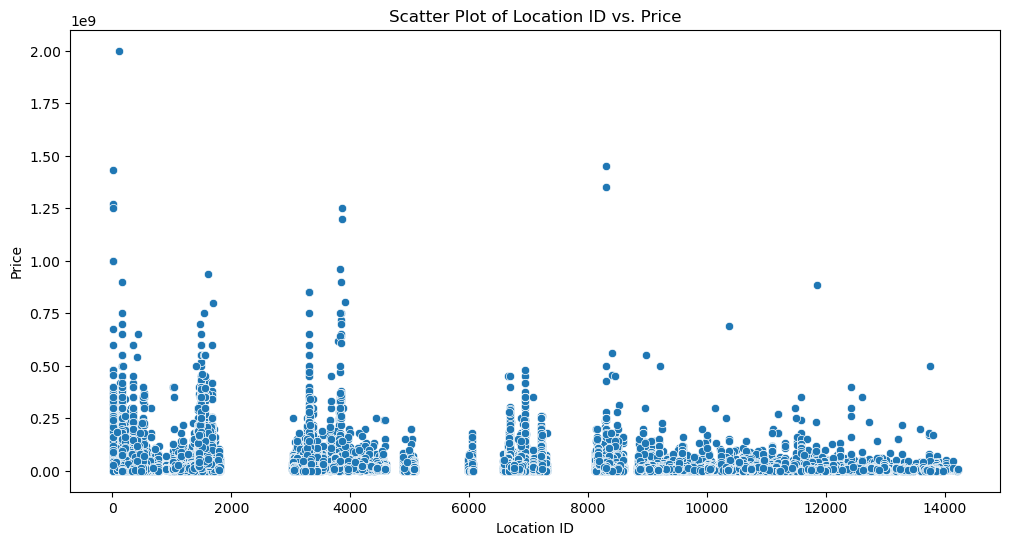

In [22]:
# Assuming df is your DataFrame
plt.figure(figsize=(12, 6))
sns.scatterplot(x='location_id', y='price', data=df)
plt.title('Scatter Plot of Location ID vs. Price')
plt.xlabel('Location ID')
plt.ylabel('Price')
plt.show()

In [23]:
# plt.figure(figsize=(15, 8))
# sns.boxplot(x='location_id', y='price', data=df)
# plt.title('Box Plot of Location ID vs. Price')
# plt.xlabel('Location ID')
# plt.ylabel('Price')
# plt.show()

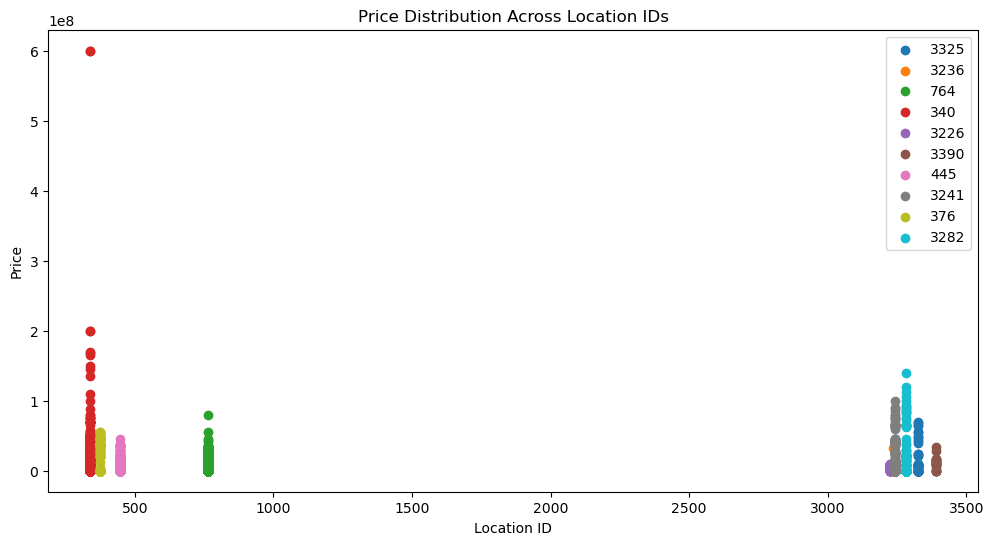

In [24]:
plt.figure(figsize=(12, 6))
for location_id in unique_locations[:10]:  # Plot for a subset of locations for visibility
    subset_df = df[df['location_id'] == location_id]
    plt.scatter(subset_df['location_id'], subset_df['price'], label=str(location_id))

plt.xlabel('Location ID')
plt.ylabel('Price')
plt.title('Price Distribution Across Location IDs')
plt.legend()
plt.show()

In [25]:
# Example: One-way ANOVA test
# H0: There is no significant difference in prices between location_id groups
# H1: There is a significant difference in prices between location_id groups
# corelatie intre numere, nu id-uri
# ANOVA: cauti diferente semnificative, pe grupuri mici, pe valori numerice
f_statistic, p_value = f_oneway(*[df['price'][df['location_id'] == location] for location in unique_locations])

print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

F-statistic: 14.759612775173302
P-value: 0.0


/home/liviu/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/liviu/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/liviu/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


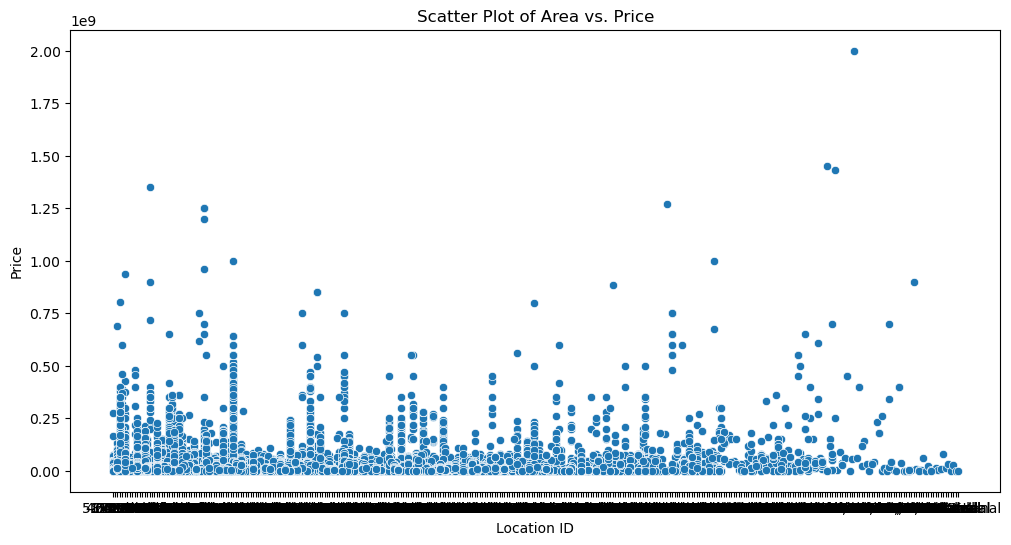

In [26]:
# Assuming df is your DataFrame
plt.figure(figsize=(12, 6))
sns.scatterplot(x='area', y='price', data=df)
plt.title('Scatter Plot of Area vs. Price')
plt.xlabel('Location ID')
plt.ylabel('Price')
plt.show()

In [27]:
# Create a new column 'Area_in_Marla' based on 'Area Type' and 'Area Size'
df['Area_in_Marla'] = df.apply(lambda row: row['Area Size'] if row['Area Type'] == 'Marla' else row['Area Size'] * 20, axis=1)

In [28]:
# property_id:
# These column appears to be identifiers or indices that might not provide valuable information for predictive modeling or exploratory data analysis (EDA). If they are simply identifiers without any meaningful patterns, they might not contribute to the understanding or prediction of house prices.

# location_id
# See above no correlation between price and location_id

# page_url:
# This column contains URLs, which are likely unique identifiers or links to specific property pages. For the purpose of predicting house prices or general analysis, the URLs may not be relevant or contribute to the modeling process.

# area
# included in "Area Type", "Area Size"

# Area Type, Area Size:
# included in "Area_in_Marla"

# Area Category
# included in "Area Size"
df.drop(['property_id', 'location_id', 'page_url', 'area', 'Area Type', 'Area Size', 'Area Category'], axis=1, inplace=True)

In [29]:
df.head()

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,price_bins,Area_in_Marla
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,02-04-2019,NaN,NaN,"(9500000.0, 11000000.0]",4.0
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,05-04-2019,NaN,NaN,"(6500000.0, 7500000.0]",5.6
2,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,07-17-2019,NaN,NaN,"(16000000.0, 18000000.0]",8.0
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,04-05-2019,NaN,NaN,"(42500000.0, 55000000.0]",40.0
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,"(6500000.0, 7500000.0]",8.0


In [30]:
df['date_added'] = pd.to_datetime(df['date_added'])
df.head()

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,price_bins,Area_in_Marla
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2019-02-04,NaN,NaN,"(9500000.0, 11000000.0]",4.0
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,2019-05-04,NaN,NaN,"(6500000.0, 7500000.0]",5.6
2,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,2019-07-17,NaN,NaN,"(16000000.0, 18000000.0]",8.0
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,2019-04-05,NaN,NaN,"(42500000.0, 55000000.0]",40.0
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,2019-07-10,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,"(6500000.0, 7500000.0]",8.0


In [31]:
df['agency'].nunique()

5761

In [32]:
df['agency'].fillna('Self', inplace=True)
df['agent'].fillna('Self', inplace=True)
df.head()

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,price_bins,Area_in_Marla
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2019-02-04,Self,Self,"(9500000.0, 11000000.0]",4.0
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,2019-05-04,Self,Self,"(6500000.0, 7500000.0]",5.6
2,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,2019-07-17,Self,Self,"(16000000.0, 18000000.0]",8.0
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,2019-04-05,Self,Self,"(42500000.0, 55000000.0]",40.0
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,2019-07-10,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,"(6500000.0, 7500000.0]",8.0


In [33]:
# Why no diff ?
# I used "diff export.csv For_EDA_dataset.csv"
df_diff = pd.concat([df, df2]).drop_duplicates(keep=False)
df_diff

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,price_bins,Area_in_Marla
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2019-02-04,Self,Self,"(9500000.0, 11000000.0]",4.0
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,2019-05-04,Self,Self,"(6500000.0, 7500000.0]",5.6
2,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,2019-07-17,Self,Self,"(16000000.0, 18000000.0]",8.0
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,2019-04-05,Self,Self,"(42500000.0, 55000000.0]",40.0
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,2019-07-10,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,"(6500000.0, 7500000.0]",8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168376,House,17700000,Bahria Town,Lahore,NaN,NaN,NaN,7,For Sale,5,NaT,NaN,NaN,NaN,10.0
168381,House,40000000,DHA Defence,Lahore,NaN,NaN,NaN,6,For Sale,5,NaT,NaN,NaN,NaN,24.0
168404,Upper Portion,25000,Chak 208 Road,Faisalabad,NaN,NaN,NaN,2,For Rent,2,NaT,NaN,NaN,NaN,12.0
168415,House,41500000,NFC 1,Lahore,NaN,NaN,NaN,6,For Sale,5,NaT,NaN,NaN,NaN,20.0


In [34]:
df.drop_duplicates(inplace=True)

In [35]:
df.to_csv('data/export.csv')

## Exploratory data analysis (EDA)

In [36]:
# # Distribution Plots for Numerical Variables
# # Set style for seaborn plots
# # INFO: skewed right
# sns.set(style="whitegrid")

# # Create distribution plots for numerical variables
# numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# plt.figure(figsize=(16, 10))
# for i, column in enumerate(numerical_columns, 1):
#     plt.subplot(3, 3, i)
#     sns.histplot(df[column], kde=True)
#     plt.title(f'Distribution of {column}')

# plt.tight_layout()
# plt.show()

/home/liviu/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/liviu/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/liviu/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


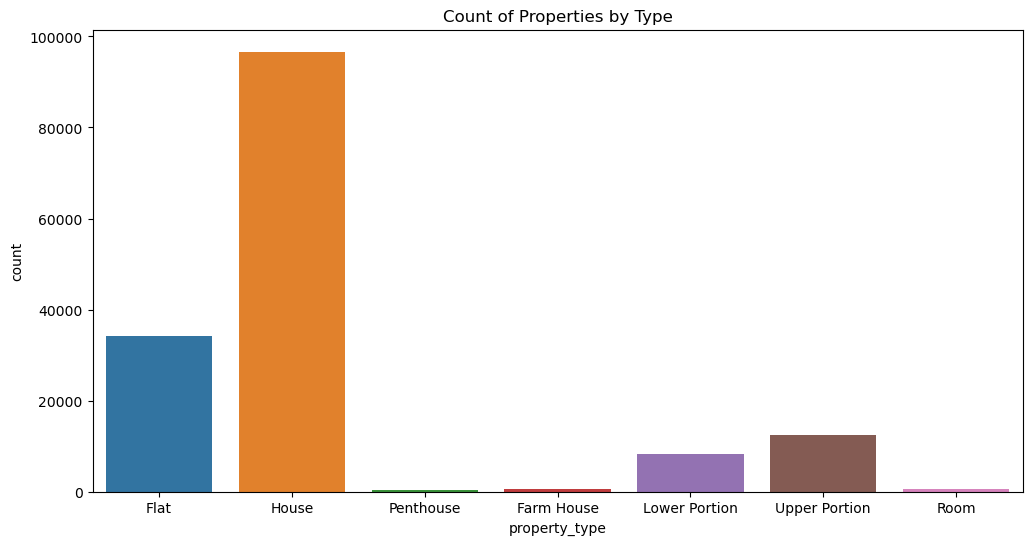

In [37]:
# Categorical Variables - Count Plot
# Create count plot for a categorical variable
plt.figure(figsize=(12, 6))
sns.countplot(x='property_type', data=df)
plt.title('Count of Properties by Type')
plt.show()

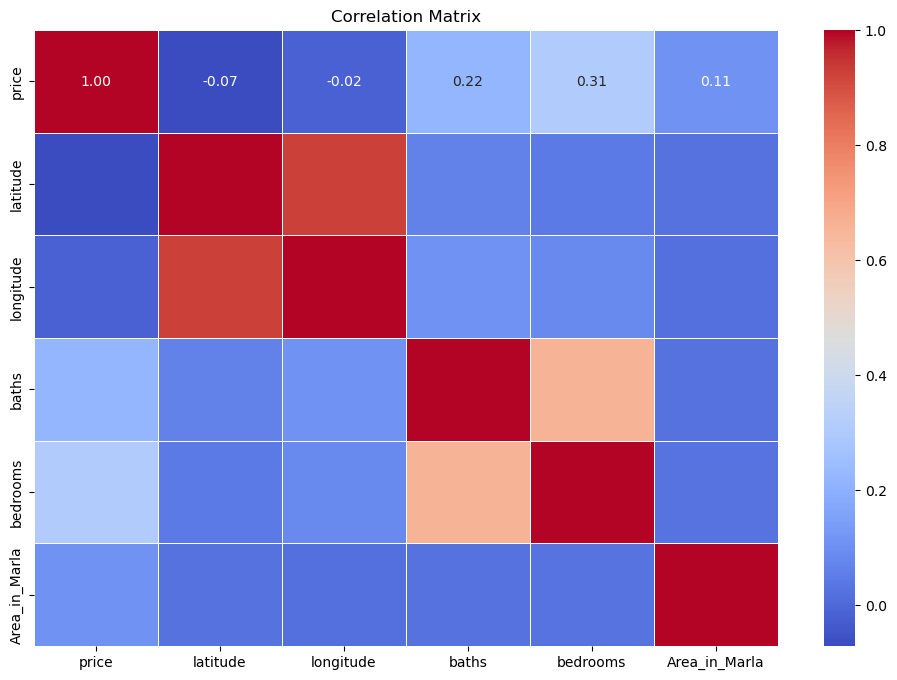

In [38]:
# Correlation Matrix
# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Create a correlation matrix for numerical columns
correlation_matrix = numerical_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

/home/liviu/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/liviu/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


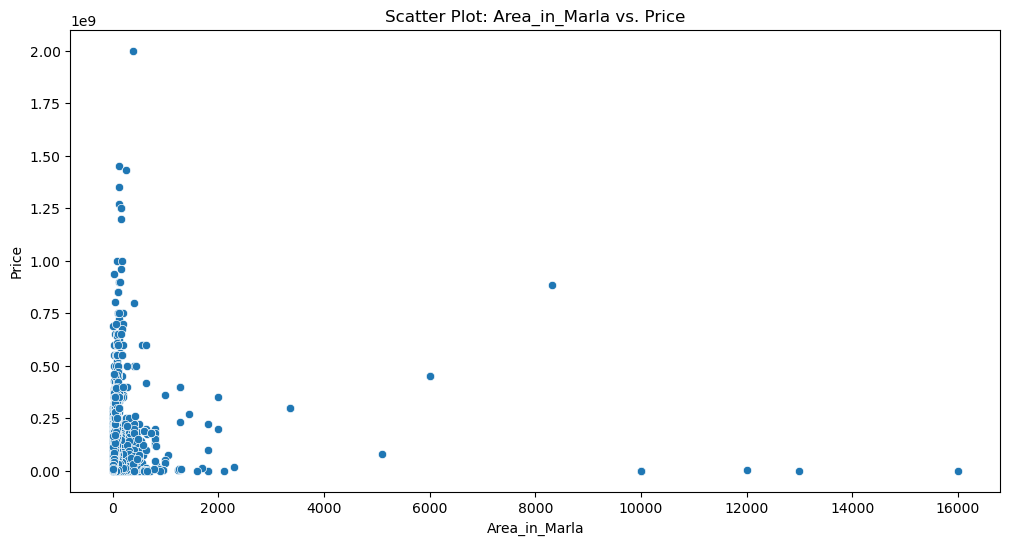

In [39]:
# Relationships with Target Variable - Scatter Plot
# Create scatter plot to explore relationship with target variable (price)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Area_in_Marla', y='price', data=df)
plt.title('Scatter Plot: Area_in_Marla vs. Price')
plt.xlabel('Area_in_Marla')
plt.ylabel('Price')
plt.show()

In [40]:
# TODO: se vad mai bine graficele dupa ce scot lat si long
# Categorical var: cross tabs
# Multi colinearity
# analiza univariata - un singur feature
# Bivariate analysis - cum interactionaza features cu features, features cu target
# normalizare, standardizare
# Data Engeneering: SQL, PySpark, Mongo

## Part 3

In [41]:
# # Select only numerical columns for the pair plot
# numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# # Create a pair plot
# TODO: analiza 1:1 individual, formulare ipoteze relatii
# sns.pairplot(df[numerical_columns])
# plt.show()

In [42]:
# TODO: lat, log plt pret pe harta
df.drop(['province_name', 'latitude', 'longitude', 'date_added', 'agency', 'agent'], axis=1, inplace=True)

In [43]:
df.describe()

,price,baths,bedrooms,Area_in_Marla
count,1.534300e+05,153430.000000,153430.000000,153430.000000
mean,1.841821e+07,2.955739,3.259408,12.333483
std,3.624713e+07,2.494301,1.971117,94.629860
min,0.000000e+00,0.000000,0.000000,0.000000
25%,2.000000e+05,1.000000,2.000000,4.900000
50%,8.700000e+06,3.000000,3.000000,7.600000
75%,2.000000e+07,5.000000,5.000000,12.000000
max,2.000000e+09,403.000000,68.000000,16000.000000


In [44]:
# CLI: diff export.csv Cleaned_data_for_model.csv | less
# df.iloc[[5,6,8,11,12,17]]
df.loc[[5,6,8,11,12,17]]

,property_type,price,location,city,baths,purpose,bedrooms,price_bins,Area_in_Marla
5,House,34500000,Ghauri Town,Islamabad,8,For Sale,8,"(27500000.0, 35000000.0]",32.0
6,House,27000000,Korang Town,Islamabad,8,For Sale,8,"(24000000.0, 27500000.0]",20.0
8,House,50000000,DHA Defence,Islamabad,7,For Sale,7,"(42500000.0, 55000000.0]",20.0
11,Flat,48000000,Diplomatic Enclave,Islamabad,2,For Sale,2,"(42500000.0, 55000000.0]",7.8
12,House,400000000,F-6,Islamabad,0,For Sale,0,"(85000000.0, 2000000000.0]",90.0
17,House,80000000,DHA Defence,Islamabad,7,For Sale,7,"(55000000.0, 85000000.0]",40.0


In [45]:
# 1. Ensure Column Order
df = df[df2.columns]

# 2. Data Alignment
df_equals_df2 = df.equals(df2)
print("Are df and df2 aligned?", df_equals_df2)
# Conclusion: We have the same table head but some data differ

Are df and df2 aligned? False


In [46]:
# Display the differences between df and df2
# diff = pd_testing.assert_frame_equal(df, df2, check_dtype=False, check_exact=False, check_categorical=False)
# print(diff)

In [47]:
df['property_type'].value_counts()

property_type
House            96643
Flat             34309
Upper Portion    12515
Lower Portion     8293
Room               663
Farm House         626
Penthouse          381
Name: count, dtype: int64

In [48]:
df[df['price'] == 0]

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
66537,House,0,Range Road,Rawalpindi,0,For Rent,0,5.0
91608,Farm House,0,Gadap Road,Karachi,0,For Sale,0,160.0
132855,House,0,Gulshan Abad,Rawalpindi,0,For Sale,0,10.0


In [49]:
df.loc[[66537]]

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
66537,House,0,Range Road,Rawalpindi,0,For Rent,0,5.0


In [50]:
df2[df2['price'] == 0]

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla


In [51]:
# df2.loc[[132855]]

In [52]:
# Drop rows with price "0"
# indexAge = df[df['price'] == 5].index
# indexAge = df[df['price'] <= 5].index
# indexAge = df[df['price'] == 0].index
# df.drop(indexAge , inplace=True)
# df[df['price'] == 0]

In [53]:
df['price'].describe()

count    1.534300e+05
mean     1.841821e+07
std      3.624713e+07
min      0.000000e+00
25%      2.000000e+05
50%      8.700000e+06
75%      2.000000e+07
max      2.000000e+09
Name: price, dtype: float64

In [54]:
df2['price'].describe()

count    9.949900e+04
mean     1.037592e+07
std      1.066000e+07
min      1.550000e+04
25%      1.500000e+05
50%      7.500000e+06
75%      1.550000e+07
max      4.490000e+07
Name: price, dtype: float64

In [55]:
df['price'].min()

0

In [56]:
df2['price'].min()

15500

In [57]:
df2.sort_values('price')

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
25210,Upper Portion,15500,Airport Housing Society,Rawalpindi,3,For Rent,3,5.0
124301,Flat,15500,Bahria Town Rawalpindi,Rawalpindi,2,For Rent,2,5.0
152438,Flat,15500,Gulistan-e-Jauhar,Karachi,2,For Rent,2,3.3
158446,House,15500,Airport Housing Society,Rawalpindi,2,For Rent,2,5.0
158447,Upper Portion,15500,Airport Housing Society,Rawalpindi,2,For Rent,2,5.0
...,...,...,...,...,...,...,...,...
153016,House,44900000,DHA Defence,Lahore,6,For Sale,5,20.0
125050,House,44900000,DHA Defence,Lahore,6,For Sale,5,20.0
115473,House,44900000,DHA Defence,Lahore,6,For Sale,5,20.0
129762,House,44900000,DHA Defence,Lahore,6,For Sale,5,20.0


In [58]:
# df[df['price'] < 15500].sort_values('price', ascending=False)
df1_select = df[df['price'] >44900000]
# len(df1_select) # <15500: 1,908
# len(df1_select) # >44900000: 15,393
df2[df2.index.isin(df1_select.index)]

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla


In [59]:
df.loc[[53681]]

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
53681,Lower Portion,20000,I-10,Islamabad,1,For Rent,2,3.0


In [60]:
# df2.loc[[1587]]

/home/liviu/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


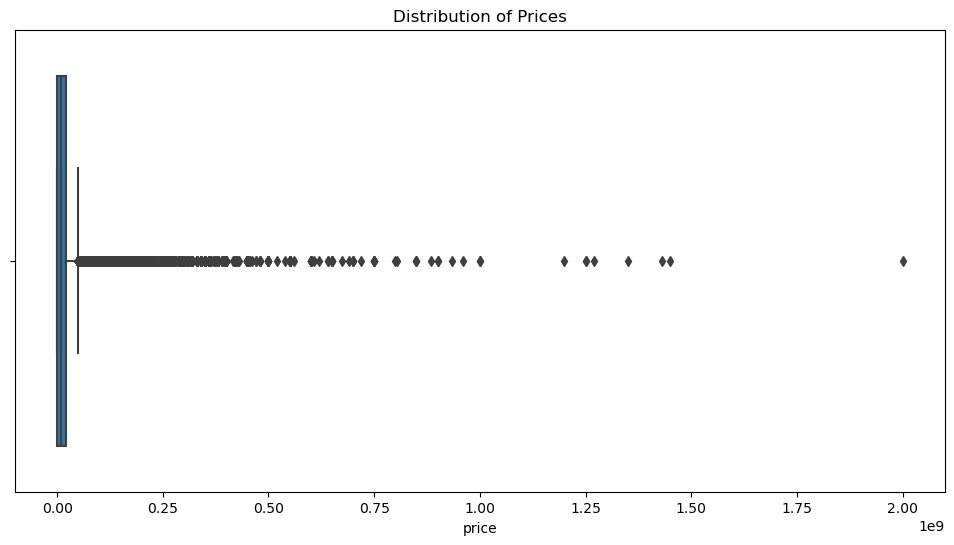

In [61]:
# TODO: transformare preturi cu taiere zerouri, transformare in USD, normalizare, z-score
# Visualize the distribution of the price column
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['price'])
plt.title('Distribution of Prices')
plt.show()

/home/liviu/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


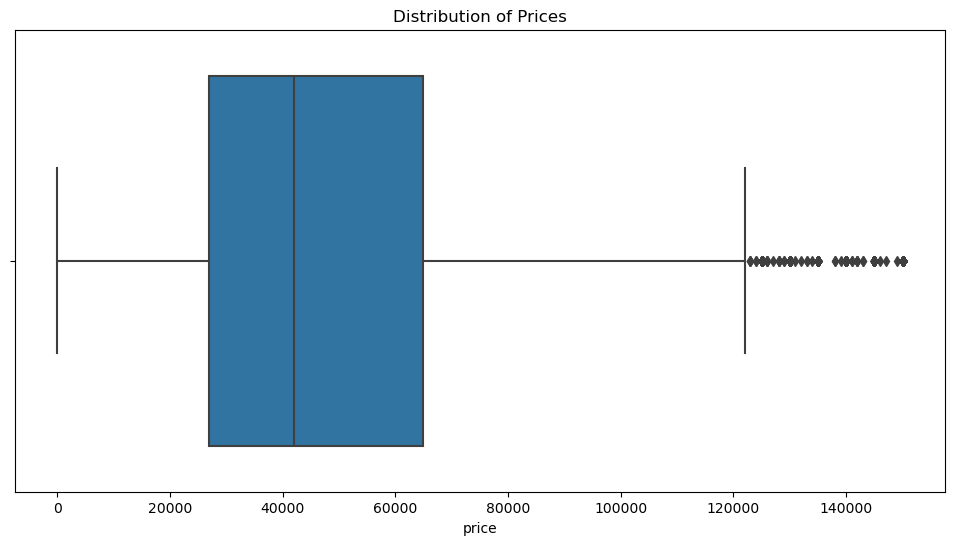

In [62]:
# 2024-02-09
data = df[df['price'] <= 150000]
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['price'])
plt.title('Distribution of Prices')
plt.show()

In [63]:
# 2024-02-09
# TODO: I've computed std. What does it mean low or high std and how can I use this information?
data['price'].std()

32486.984006214807

In [64]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = max(0, Q1 - 1.5 * IQR)  # Ensure lower bound is not negative
upper_bound = Q3 + 1.5 * IQR

# Identify and remove outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
df_no_outliers = df[~((df['price'] < lower_bound) | (df['price'] > upper_bound))]

# Display information about the outliers
print("Number of outliers:", len(outliers))
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

# Additional statistics for the 'price' column after removing outliers
print("Statistics after removing outliers:")
print(df_no_outliers['price'].describe())

Number of outliers: 12581
Lower bound: 0
Upper bound: 49700000.0
Statistics after removing outliers:
count    1.408490e+05
mean     1.081259e+07
std      1.179342e+07
min      0.000000e+00
25%      1.200000e+05
50%      7.500000e+06
75%      1.600000e+07
max      4.970000e+07
Name: price, dtype: float64


In [65]:
# Why removing this range
idx = df[(df['price'] < 15500) | (df['price'] > 44900000)].index
df.drop(idx, inplace=True)
df.describe()

,price,baths,bedrooms,Area_in_Marla
count,1.361290e+05,136129.000000,136129.000000,136129.000000
mean,1.022697e+07,2.801975,3.096254,10.141691
std,1.075112e+07,2.393149,1.844253,83.844802
min,1.550000e+04,0.000000,0.000000,0.000000
25%,1.300000e+05,1.000000,2.000000,4.800000
50%,7.500000e+06,3.000000,3.000000,7.000000
75%,1.550000e+07,4.000000,4.000000,10.000000
max,4.490000e+07,403.000000,68.000000,16000.000000


In [66]:
column = 'baths'
print(df[column].min())
print(df2[column].min())

print(df[column].max())
print(df2[column].max())

0
1
403
7


In [67]:
df1_select = df[df['baths'] > 7]
# len(df1_select) # == 0: 32,506
# len(df1_select) # >7: 2,123
df2[df2.index.isin(df1_select.index)]

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla


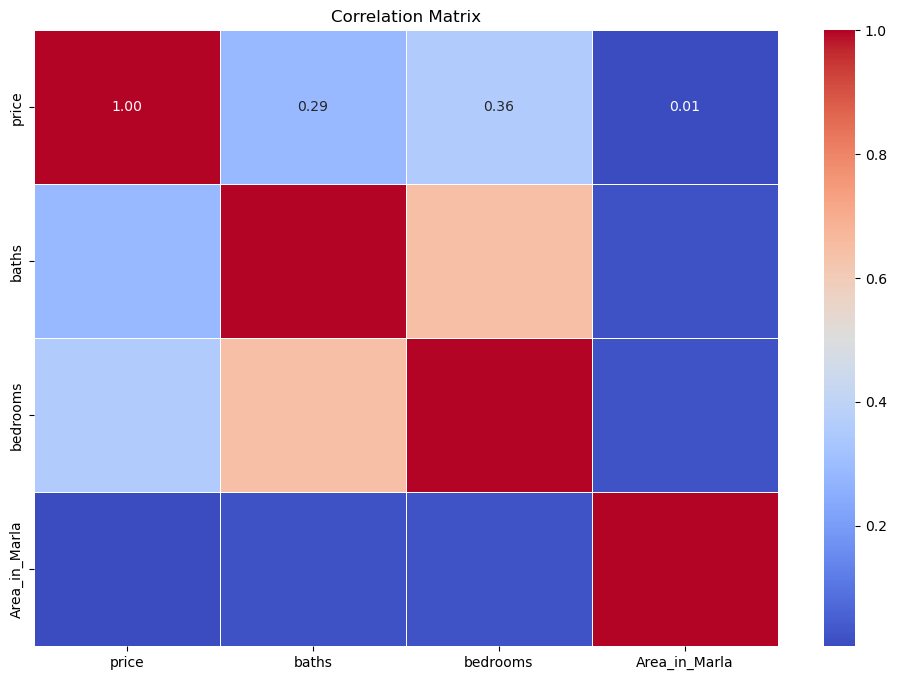

In [68]:
# Correlation Matrix
# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Create a correlation matrix for numerical columns
correlation_matrix = numerical_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [69]:
# Why removing this range
idx = df[(df['baths'] == 0) | (df['baths'] > 7)].index
df.drop(idx, inplace=True)

In [70]:
column = 'bedrooms'
print(df[column].min())
print(df2[column].min())

print(df[column].max())
print(df2[column].max())

0
0
13
6


In [71]:
df1_select = df[df['bedrooms'] > 6]
# len(df1_select) # >6: 1,897
df2[df2.index.isin(df1_select.index)]

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla


In [72]:
# Why removing this range
idx = df[df['bedrooms'] > 6].index
df.drop(idx, inplace=True)

In [73]:
column = 'Area_in_Marla'
print(df[column].min())
print(df2[column].min())

print(df[column].max())
print(df2[column].max())

0.0
0.0
16000.0
194.0


In [74]:
df1_select = df[df['Area_in_Marla'] > 194]
# len(df1_select) # >6: 104
df2[df2.index.isin(df1_select.index)]

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla


In [75]:
# Why removing this range
idx = df[df['Area_in_Marla'] > 194].index
df.drop(idx, inplace=True)

In [76]:
df.to_csv('data/export.csv')

In [77]:
import warnings

# Suppress FutureWarning related to is_sparse
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.utils.validation")



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assume 'X' contains your features (independent variables) and 'y' is your target variable (price)
X = df2.drop('price', axis=1)
y = df2['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define columns and transformers for preprocessing
categorical_cols = ['property_type', 'location', 'city', 'purpose']
numeric_cols = ['baths', 'bedrooms', 'Area_in_Marla']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Create a pipeline with the preprocessor and the Linear Regression model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 34819666088374.945
R^2 Score: 0.6957935985102317


In [78]:
# Assume 'new_data' is a DataFrame containing a single row of data for prediction
new_data = pd.DataFrame({
    'property_type': ['Flat'],
    'location': ['G-10'],
    'city': ['Islamabad'],
    'baths': [2],
    'purpose': ['For Sale'],
    'bedrooms': [2],
    'Area_in_Marla': [4.0]
})

# Use the trained model to make predictions on the new data
predicted_price = model.predict(new_data)

# Display the predicted price
print("Predicted Price:", predicted_price[0])

Predicted Price: 11801319.488502625


In [79]:
# What should be thep rice in this situation?
df[
    (df['property_type'] == 'Flat')
    & (df['location'] == 'G-10')
    & (df['city'] == 'Islamabad')
    & (df['baths'] == 2)
    & (df['purpose'] == 'For Sale')
    & (df['bedrooms'] == 2)
    & (df['Area_in_Marla'] == 4.0)
]
df

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0
...,...,...,...,...,...,...,...,...
168435,Flat,7500000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
168436,House,8800000,Bahria Town Karachi,Karachi,4,For Sale,3,8.0
168438,House,14000000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
168439,House,14000000,Bahria Town Karachi,Karachi,4,For Sale,4,14.0


In [80]:
# What should be thep rice in this situation?
df[
    (df['property_type'] == 'Flat')
    & (df['location'] == 'G-10')
    & (df['city'] == 'Islamabad')
    & (df['baths'] == 2)
    & (df['purpose'] == 'For Sale')
    & (df['bedrooms'] == 2)
    & (df['Area_in_Marla'] == 4.0)
]['price'].mean()

7007894.736842105

In [81]:
# TODO:
# stadardizare si normalizare
# marire range outlieri eliminati
# feature engineering

## Q&A 1

* Kaggle dataset differences: basic, EDA, model
* Row numbers for previous datasets
* What columns to keep?
* Is there any need to remove other rows?

## Q&A 2:
* is my logic of remove `location_id` column correct?

## Q&A 3:
* see: `idx = df[(df['price'] < 15500) | (df['price'] > 44900000)].index`. Same for the other numerical columns